In [1]:
import pandas as pd

In [2]:
headlines = pd.read_csv("HNHeadlines.txt", header=None, index_col=0).iloc[:, 0]
headlines

0
0      Uber Co-Founder Travis Kalanick Said to Plan S...
1                         Update on Meltdown and Spectre
2      Intel Issues Updates to Protect Systems from S...
3       Where Pot Entrepreneurs Go When the Banks Say No
4                      Announcing the OpenWrt/LEDE merge
5                 Transpile Java Bytecode to WebAssembly
6                                     iMac Pro's T2 chip
7      Productivity in 2017: analyzing 225 million ho...
8      About speculative execution vulnerabilities in...
9      “My ten hour white noise video now has five co...
10                Site Isolation – The Chromium Projects
11     Xerox Alto zero-day: cracking disk password pr...
12                     The Best Things and Stuff of 2017
13     More details about mitigations for the CPU Spe...
14                     In pursuit of Otama's tone (2017)
15            Show HN: PAST, a secure alternative to JWT
16     Ink/stitch: an Inkscape extension for machine ...
17     Texttop – An interacti

In [3]:
from nltk import ngrams

In [4]:
headline_sets = [set(''.join(u) for u in ngrams(h.lower(), 3)) for h in headlines]
headline_sets[:3]

[{' 29',
  ' co',
  ' ka',
  ' of',
  ' pl',
  ' sa',
  ' st',
  ' to',
  ' tr',
  '% o',
  '-fo',
  '29%',
  '9% ',
  'aid',
  'ake',
  'ala',
  'ale',
  'an ',
  'ani',
  'avi',
  'ber',
  'ck ',
  'co-',
  'd t',
  'der',
  'e o',
  'er ',
  'f 2',
  'f s',
  'fou',
  'ick',
  'id ',
  'is ',
  'k s',
  'kal',
  'lan',
  'le ',
  'n s',
  'nde',
  'nic',
  'o p',
  'o-f',
  'of ',
  'oun',
  'pla',
  'r c',
  'r t',
  'rav',
  's k',
  'sai',
  'sal',
  'sta',
  'tak',
  'to ',
  'tra',
  'ube',
  'und',
  'vis'},
 {' an',
  ' me',
  ' on',
  ' sp',
  'and',
  'ate',
  'ctr',
  'd s',
  'dat',
  'dow',
  'e o',
  'ect',
  'elt',
  'ltd',
  'mel',
  'n a',
  'n m',
  'nd ',
  'on ',
  'own',
  'pda',
  'pec',
  'spe',
  'tdo',
  'te ',
  'tre',
  'upd',
  'wn '},
 {' ex',
  ' fr',
  ' is',
  ' pr',
  ' se',
  ' sy',
  ' to',
  ' up',
  'ate',
  'ct ',
  'cur',
  'dat',
  'ect',
  'ecu',
  'el ',
  'ems',
  'es ',
  'exp',
  'fro',
  'int',
  'iss',
  'its',
  'ity',
  'l i',
  'loi',

In [5]:
import numpy as np

In [6]:
sims = np.zeros((len(headlines), len(headlines)))    # Will contain the affinity matrix
for i in range(len(headlines)):
    for j in range(i, len(headlines)):
        h1, h2 = headline_sets[i], headline_sets[j]
        js = len(h1.intersection(h2))/len(h1.union(h2))    # Compute the Jaccard similarity for the two documents
        sims[i,j] = sims[j,i] = js    # Store the Jaccard similarity in the appropriate entries of the matrix

sims[:5, :5]

array([[1.        , 0.01176471, 0.02631579, 0.00980392, 0.02298851],
       [0.01176471, 1.        , 0.06097561, 0.01388889, 0.03508772],
       [0.02631579, 0.06097561, 1.        , 0.        , 0.        ],
       [0.00980392, 0.01388889, 0.        , 1.        , 0.04109589],
       [0.02298851, 0.03508772, 0.        , 0.04109589, 1.        ]])

In [7]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target
iris_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

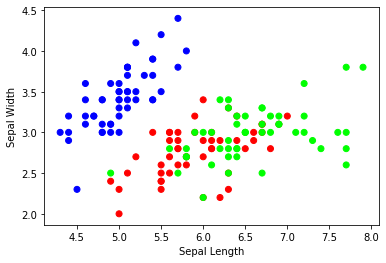

In [9]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

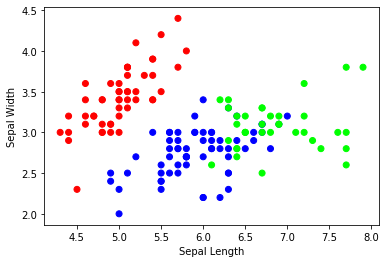

In [11]:
irisclust1 = AgglomerativeClustering(n_clusters=3,            # Three clusters
                                     affinity="euclidean",    # "Closeness" is defined using Euclidean distance
                                     linkage="average")       # A cluster's location is based on the average of its member points
irisclust1 = irisclust1.fit(iris_data)

# Visualizing the clustering
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=irisclust1.labels_, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

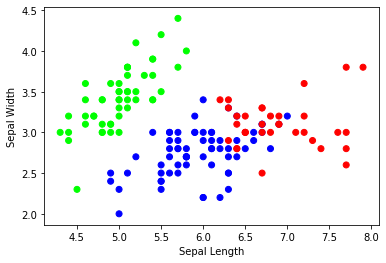

In [12]:
irisclust2 = AgglomerativeClustering(n_clusters=3,            # Three clusters with cluster centers chosen as random dataset
                                                              # points
                                     affinity="manhattan",    # "Closeness" is defined using Manhattan distance
                                     linkage="complete")      # A cluster's location is based on the maximum distance among
                                                              # member points
irisclust1 = irisclust2.fit(iris_data)

# Visualizing the clustering
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=irisclust2.labels_, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [13]:
headlineclust = AgglomerativeClustering(n_clusters=10, affinity="precomputed", linkage="average")
hclusters = headlineclust.fit_predict(1 - sims)    # Here we provide the affinity matrix; fit_predict() both fits and returns the
                                               # the assigned clusters
hclusters

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 5, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1,
       1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 7, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1], d

In [14]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
%matplotlib inline

def silhouette_plot(data, labels, metric="euclidean", xticks = True):
    """Creates a silhouette plot given a dataset and the labels corresponding to cluster assignment, and reports the
       average silhouette score"""
    silhouette_avg = silhouette_score(data, labels,
                                      metric=metric)    # The average silhouette score over the entire sample
    sample_silhouette_values = silhouette_samples(data, labels,
                                                  metric=metric)    # The silhouette score of each individual data point
    
    # This loop creates the silhouettes in the silhouette plot
    y_lower = 10    # For space between silhouettes
    for k in np.unique(labels):
        cluster_values = sample_silhouette_values[labels == k]
        cluster_values.sort()
        nk = len(cluster_values)
        y_upper = y_lower + nk
        color = cm.spectral(float(k) / len(np.unique(labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_values,
                          facecolor=color, edgecolor=color)
        plt.text(-0.05, y_lower + 0.5 * nk, str(k))
        y_lower = y_upper + 10
    
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    if xticks:
        plt.xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.yticks([])
    plt.xlabel("Silhouette Score")
    plt.ylabel("Cluster")
    plt.show()
    
    print("The average silhouette score is", silhouette_avg)

In [ ]:
silhouette_plot(1 - sims, hclusters, metric="precomputed", xticks=False)    # The silhouette plot requires a distance
                                                                            # matrix

In [ ]:
headlines[hclusters == 1]